# Statistical Thinking in Python (Part 2)

👋 

In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from empiricaldist import Cdf

# Importing course datasets as DataFrames
anscombe = pd.read_csv('datasets/anscombe.csv', header=[0,1])
bees = pd.read_csv('datasets/bee_sperm.csv', comment='#')
literacy_fertility = pd.read_csv('datasets/female_literacy_fertility.csv')
beaks_1975 = pd.read_csv('datasets/finch_beaks_1975.csv')
beaks_2012 = pd.read_csv('datasets/finch_beaks_2012.csv')
frogs = pd.read_csv('datasets/frog_tongue.csv', comment='#')
mlb = pd.read_csv('datasets/mlb_nohitters.csv')
weather = pd.read_csv('datasets/sheffield_weather_station.csv', comment='#', delimiter='\s+', na_values='---')



In [2]:
literacy_fertility

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"
...,...,...,...,...,...
157,Vanuatu,OCE,79.5,3.883,"233,866"
158,Samoa,OCE,98.5,3.852,"178,869"
159,Sao Tomé-et-Principe,AF,83.3,3.718,"160,174"
160,Aruba,LAT,98.0,1.732,"105,455"


In [3]:
literacy_fertility['female literacy'] = (literacy_fertility['female literacy'] - 100) * -1


In [4]:
literacy_fertility.rename(columns={'female literacy':'illiteracy'}, inplace=True)

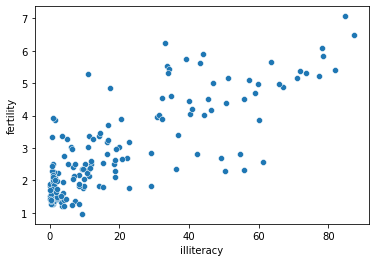

In [5]:
sns.scatterplot(x= 'illiteracy', y= 'fertility', data=literacy_fertility);

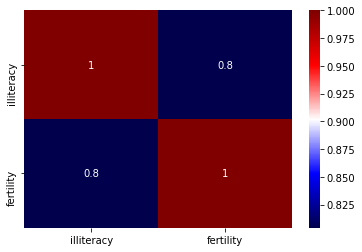

In [6]:
sns.heatmap(literacy_fertility.corr(), annot=True, cmap='seismic');



## Linear Regression

In [7]:
# Perform a linear regression using np.polyfit()
slope , intercept =  np.polyfit(literacy_fertility['illiteracy'], literacy_fertility['fertility'],1)

# Print the results to the screen
print('slope =', slope, 'children per woman / percent illiterate')
print('intercept =', intercept, 'children per woman')

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


In [8]:
slope , intercept

(0.04979854809063423, 1.888050610636557)

In [9]:
# Make theoretical line to plot
x = np.array([0,100])
y = slope * x +  intercept

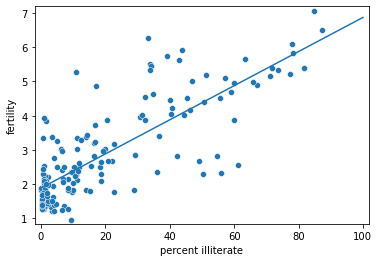

In [10]:
# Plot the illiteracy rate versus fertility
sns.scatterplot(x= 'illiteracy', y= 'fertility', data=literacy_fertility)
plt.plot(x,y);
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')


In [11]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,.1,200)

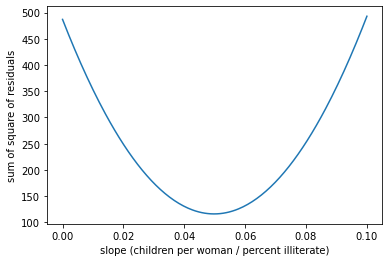

In [12]:
# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((literacy_fertility['fertility'] - a*literacy_fertility['illiteracy'] - intercept)**2)
    
# Plot the RSS
plt.plot(a_vals,rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()    

## Linear regression on appropriate Anscombe data

In [13]:
anscombe.head()

0           1           2           3      
      x     y     x     y     x      y    x     y
0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
2  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71
3   9.0  8.81   9.0  8.77   9.0   7.11  8.0  8.84
4  11.0  8.33  11.0  9.26  11.0   7.81  8.0  8.47

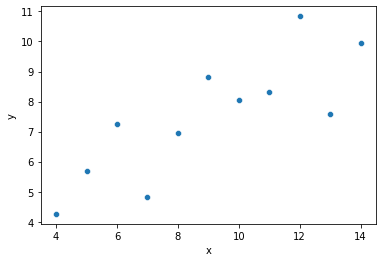

In [14]:
#for i in range(0,4)
sns.scatterplot(x= 'x', y= 'y', data=anscombe['0']);

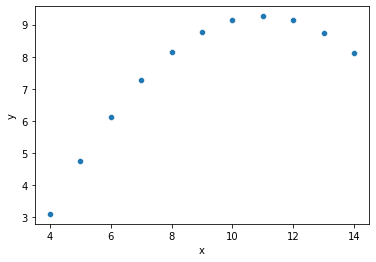

In [15]:
sns.scatterplot(x= 'x', y= 'y', data=anscombe['1']);

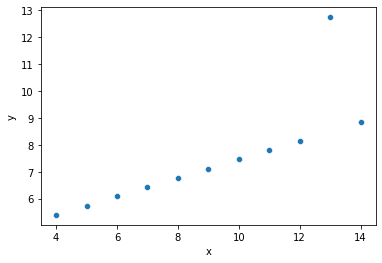

In [16]:
sns.scatterplot(x= 'x', y= 'y', data=anscombe['2']);

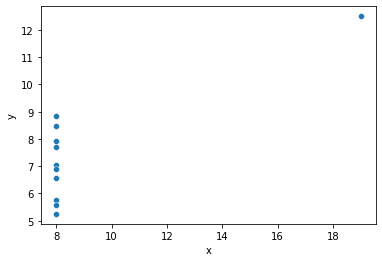

In [17]:
sns.scatterplot(x= 'x', y= 'y', data=anscombe['3']);

0.5000909090909091 3.000090909090908


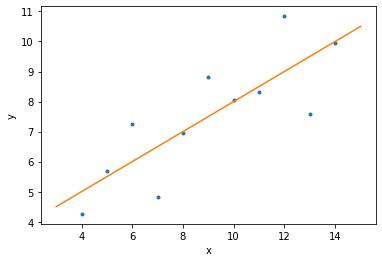

In [18]:
x = anscombe['0']['x']
y = anscombe['0']['y']

# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)
# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.plot(x_theor,y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

0.4997272727272729 3.002454545454545


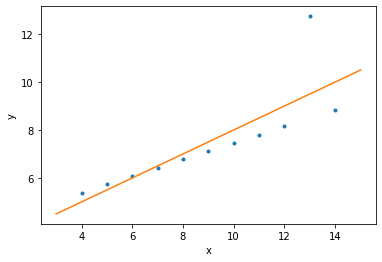

In [19]:
x = anscombe['2']['x']
y = anscombe['2']['y']

# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)
# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.plot(x_theor,y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [20]:
anscombe_x = []
anscombe_y = []
for i in range(0,4):
    anscombe_x.append(anscombe[str(i)]['x'])
    anscombe_y.append(anscombe[str(i)]['y'])
    
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909091 intercept: 3.000090909090908
slope: 0.4999999999999999 intercept: 3.000909090909089
slope: 0.4997272727272729 intercept: 3.002454545454545
slope: 0.49990909090909097 intercept: 3.0017272727272717


## Visualizing bootstrap samples

In [21]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [22]:
weather.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6.0,122.1,NaN
1,1883,2,8.0,2.8,2.0,69.8,NaN
2,1883,3,4.8,-1.6,23.0,29.6,NaN
3,1883,4,12.2,3.8,2.0,74.0,NaN
4,1883,5,14.7,6.2,0.0,31.2,NaN


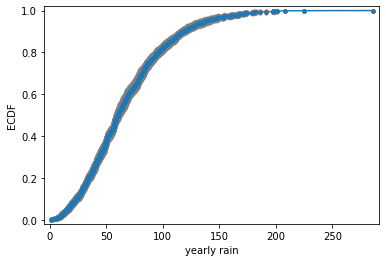

<Figure size 864x1152 with 0 Axes>

In [23]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(weather['rain'], size=len(weather['rain']))
      # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.2);

    
  
#Compute and plot ECDF from original data
x, y = ecdf(weather['rain'])
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rain')
_ = plt.ylabel('ECDF')
plt.figure(figsize=(12,16));
# Show the plot
plt.show()    
    
    

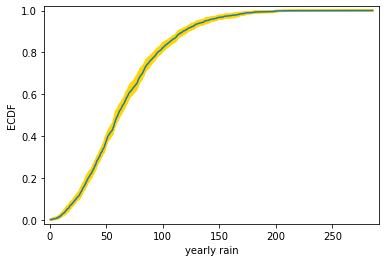

<Figure size 864x1152 with 0 Axes>

In [24]:
#from empiricaldist import Cdf

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(weather['rain'], size=len(weather['rain']))
    # Compute and plot ECDF from bootstrap sample
    Cdf.from_seq(bs_sample).plot(color='gold')

    
#Compute and plot ECDF from original data

Cdf.from_seq(weather['rain']).plot()

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rain')
_ = plt.ylabel('ECDF')
plt.figure(figsize=(12,16));
# Show the plot
plt.show() 

## Generating many bootstrap replicates

In [25]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(shape=size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [26]:
bootstrap_replicate_1d(weather['rain'], np.std)

37.244473630243405

In [27]:
weather['rain'].mean()

66.75024968788998

0.9488593574676786
0.9603926629107423


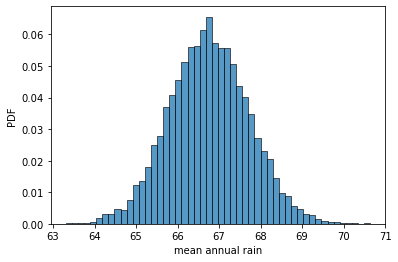

In [28]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
rain = np.array(weather['rain'])
bs_replicates = draw_bs_reps(rain, np.mean, 10000)

# Compute and print SEM
sem = np.std(rain) / np.sqrt(len(rain))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = sns.histplot(bs_replicates, bins=50, stat = "probability")
_ = plt.xlabel('mean annual rain')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## Confidence intervals of rainfall data

In [29]:
np.percentile(bs_replicates, [2.5, 97.5])

array([64.89475499, 68.66045724])

## Bootstrap replicates of other statistics

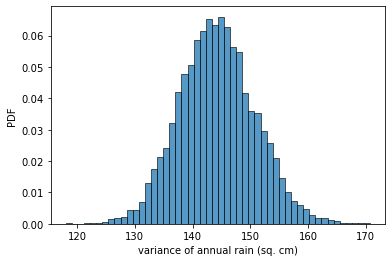

In [30]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rain,np.var,10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/10

# Make a histogram of the results
_ = sns.histplot(bs_replicates, stat = "probability", bins=50)
_ = plt.xlabel('variance of annual rain (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## A function to do pairs bootstrap

In [31]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(shape=size)
    bs_intercept_reps = np.empty(shape=size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [32]:
fertility = literacy_fertility['fertility']
illiteracy = literacy_fertility['illiteracy']

[0.0442861  0.05533117]


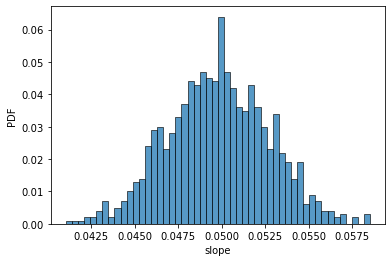

In [33]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy,fertility,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = sns.histplot(bs_slope_reps, bins=50, stat='probability')
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

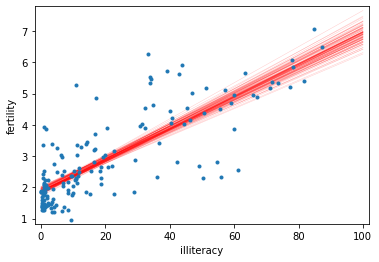

In [34]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

 ## Generating a permutation sample

In [35]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [36]:
rain_june = weather[weather['mm'] == 6]['rain']
rain_november = weather[weather['mm'] == 11]['rain']

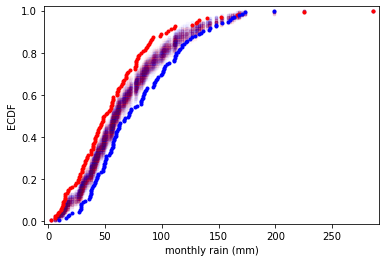

In [37]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june,rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rain (mm)')
_ = plt.ylabel('ECDF')
plt.show()

## Generating permutation replicates

In [38]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [39]:
frogs.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


In [40]:
frogs['ID'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

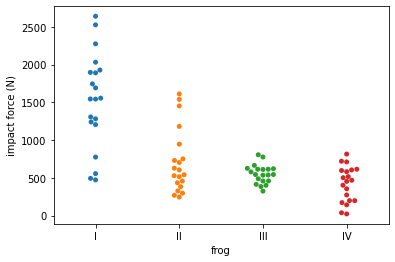

In [41]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact force (mN)', data=frogs)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

## Permutation test on frog data

In [42]:
np.array(frogs[frogs['ID'] == 'I']['impact force (mN)']/1000).mean()

1.5301999999999998

In [43]:
np.array(frogs[frogs['ID'] == 'II']['impact force (mN)']/1000).mean()

0.7073500000000001

In [44]:
np.array(frogs[frogs['ID'] == 'III']['impact force (mN)']/1000).mean()

0.5500999999999999

In [45]:
np.array(frogs[frogs['ID'] == 'IV']['impact force (mN)']/1000).mean()

0.4191000000000001

In [46]:
force_a = np.array(frogs[frogs['ID'] == 'II']['impact force (mN)']/1000)
force_b = np.array(frogs[frogs['ID'] == 'IV']['impact force (mN)']/1000)
force_c = np.array(frogs[frogs['ID'] == 'III']['impact force (mN)']/1000)

In [47]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0054


## A one-sample bootstrap hypothesis test

Another juvenile frog was studied, Frog III, and you want to see if Frog II and Frog III have similar impact forces. Unfortunately, you do not have Frog III's impact forces available, but you know they have a mean of 0.55 N.

In [48]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0065


## A two-sample bootstrap hypothesis test for difference of means

In [49]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [50]:
empirical_diff_means = diff_of_means(force_a,force_b)

In [51]:
# Compute mean of all forces: mean_force
forces_concat = np.concatenate((force_a,force_b))


mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates > (np.mean(force_a) - np.mean(force_b)))/ 10000
print('p-value =', p)

p-value = 0.0054


## The vote for the Civil Rights Act in 1964

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

In [52]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

## Hypothesis test on Pearson correlation


The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis.

In [53]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [54]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy,fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / 10000
print('p-val =', p)

p-val = 0.0


We got a p-value of zero. In hacker statistics, this means that your p-value is very low, since we never got a single replicate in the 10,000 we took that had a Pearson correlation greater than the observed one.

## Do neonicotinoid insecticides have unintended consequences?

In [55]:
bees.head()

,Specimen,Treatment,Environment,TreatmentNCSS,Sample ID,Colony,Cage,Sample,Sperm Volume per 500 ul,Quantity,ViabilityRaw (%),Quality,Age (d),Infertil,AliveSperm,Quantity Millions,Alive Sperm Millions,Dead Sperm Millions
0,227,Control,Cage,1,C2-1-1,2,1,1,2150000,2150000,96.7263814616756,96.726381,14,0,2079617,2.1500,2.079617,0.070383
1,228,Control,Cage,1,C2-1-2,2,1,2,2287500,2287500,96.3498079760595,96.349808,14,0,2204001,2.2875,2.204001,0.083499
2,229,Control,Cage,1,C2-1-3,2,1,3,87500,87500,98.75,98.750000,14,0,86406,0.0875,0.086406,0.001094
3,230,Control,Cage,1,C2-1-4,2,1,4,1875000,1875000,93.2874208336941,93.287421,14,0,1749139,1.8750,1.749139,0.125861
4,231,Control,Cage,1,C2-1-5,2,1,5,1587500,1587500,97.7925061050061,97.792506,14,0,1552456,1.5875,1.552456,0.035044


In [56]:
control = bees[bees['Treatment'] == 'Control']['AliveSperm']
treated = bees[bees['Treatment'] == 'Pesticide']['AliveSperm']

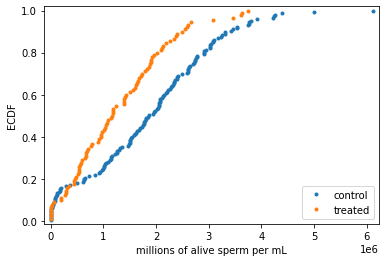

In [57]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

## Bootstrap hypothesis test on bee sperm counts


In [58]:
# Compute the difference in mean sperm count: diff_means
diff_means =np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate([control, treated]))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)


p-value = 0.0


The p-value is small, most likely less than 0.0001, since we never saw a bootstrap replicated with a difference of means at least as extreme as what was observed

## EDA of beak depths of Darwin's finches


In [59]:
beaks_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [60]:
beaks_2012.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [61]:
beaks_2012['species'].unique()

array(['fortis', 'scandens'], dtype=object)

In [62]:
beaks_1975['species'].unique()

array(['fortis', 'scandens'], dtype=object)

In [63]:
beaks_1975['year'] = ['1975']*403

In [64]:
beaks_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   band     248 non-null    int64  
 1   species  248 non-null    object 
 2   blength  248 non-null    float64
 3   bdepth   248 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ KB


In [65]:
beaks_2012['year'] = ['2012']*248

In [66]:
df = beaks_2012.merge(beaks_1975.rename(columns={'Beak length, mm':'blength', 'Beak depth, mm':'bdepth'}),how='outer')
df.head(5)

,band,species,blength,bdepth,year
0,19022,fortis,10.0,8.5,2012
1,19028,fortis,12.5,8.9,2012
2,19032,fortis,9.3,7.5,2012
3,19041,fortis,10.3,9.6,2012
4,19044,fortis,11.0,9.2,2012


In [67]:
df.rename(columns={'blength': 'beak_length', 'bdepth': 'beak_depth'}, inplace=True)

In [68]:
df.head()

,band,species,beak_length,beak_depth,year
0,19022,fortis,10.0,8.5,2012
1,19028,fortis,12.5,8.9,2012
2,19032,fortis,9.3,7.5,2012
3,19041,fortis,10.3,9.6,2012
4,19044,fortis,11.0,9.2,2012


In [69]:
df = df[df['species']=='scandens']

In [70]:
df

,band,species,beak_length,beak_depth,year
121,19026,scandens,14.30,9.40,2012
122,19028,scandens,12.50,8.90,2012
123,19029,scandens,13.70,9.50,2012
124,19094,scandens,13.80,11.00,2012
125,19122,scandens,12.00,8.70,2012
...,...,...,...,...,...
646,20225,scandens,14.55,9.45,1975
647,20252,scandens,14.05,9.05,1975
648,20255,scandens,14.45,8.75,1975
649,20266,scandens,15.05,9.45,1975


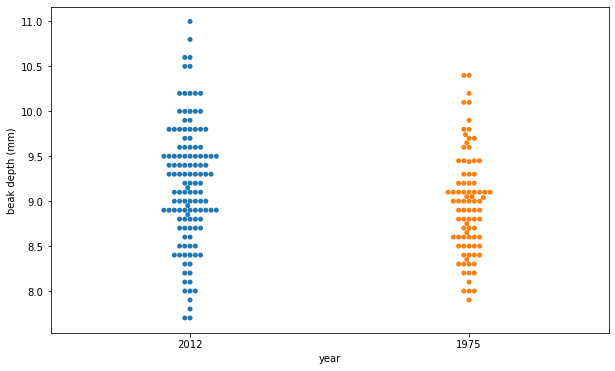

In [71]:
# Create bee swarm plot
plt.figure(figsize=(10, 6))
_ = sns.swarmplot(x='year', y='beak_depth', data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()


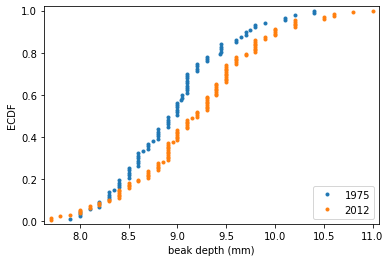

In [72]:
# Compute ECDFs
x_1975, y_1975 = ecdf(df[df['year']== '1975']['beak_depth'])
x_2012, y_2012 = ecdf(df[df['year']== '2012']['beak_depth'])

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [73]:
bd_1975 = df[df['year']== '1975']['beak_depth']
bd_2012 = df[df['year']== '2012']['beak_depth']

In [74]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000 )
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.2262204724409429 mm
95% confidence interval = [0.06085435 0.39035128] mm


In [75]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted,np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0035


We get a p-value of 0.0034, which suggests that there is a statistically significant difference

## EDA of beak length and depth

In [76]:
bl_1975 = df[df['year']== '1975']['beak_length']
bl_2012 = df[df['year']== '2012']['beak_length']

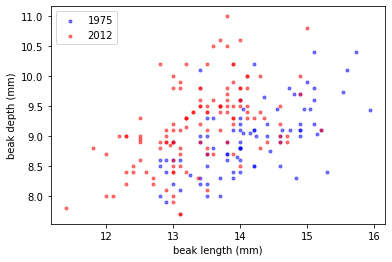

In [77]:
# Make scatter plot of 1975 data
_ = plt.scatter(bl_1975, bd_1975, marker='.',
             linestyle='None', alpha=.5, color='blue')

# Make scatter plot of 2012 data
_ = plt.scatter(bl_2012, bd_2012, marker='.',
            linestyle='None', alpha=.5, color='red')

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In [78]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(np.array(bl_1975), np.array(bd_1975), 1)
slope_2012, intercept_2012 = np.polyfit(np.array(bl_2012), np.array(bd_2012), 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(np.array(bl_1975), np.array(bd_1975), 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(np.array(bl_2012), np.array(bd_2012), 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(
                            bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(
                            bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.32232798 0.58972743]
1975: intercept = 2.390875236584227 conf int = [0.67060569 4.35821159]
2012: slope = 0.462630358835313 conf int = [0.32422576 0.59610645]
2012: intercept = 2.977247498236017 conf int = [1.18701496 4.81066994]


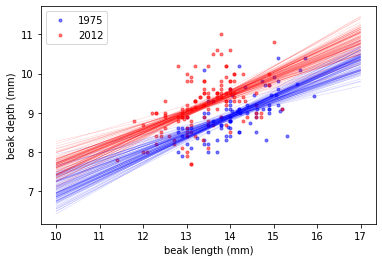

In [79]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x +bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

## Beak length to depth ratio

In [80]:
# Compute length-to-depth ratios
ratio_1975 = np.array(bl_1975/bd_1975)
ratio_2012 = np.array(bl_2012/bd_2012)

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012,np.mean,10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55692462 1.60039081]
2012: mean ratio = 1.4658342276847767 conf int = [1.44444756 1.48729348]


The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

## EDA of heritability


The array bd_parent_scandens contains the average beak depth (in mm) of two parents of the species G. scandens. The array bd_offspring_scandens contains the average beak depth of the offspring of the respective parents. The arrays bd_parent_fortis and bd_offspring_fortis contain the same information about measurements from G. fortis birds.

In [81]:
bd_parent_scandens = [8.3318, 8.4035, 8.5317, 8.7202, 8.7089, 8.7541, 8.773, 8.8107, 8.7919, 8.8069, 8.6523, 8.6146, 8.6938, 8.7127, 8.7466, 8.7504, 8.7805, 8.7428, 8.7164, 8.8032, 8.8258, 8.856, 8.9012, 8.9125, 8.8635, 8.8258, 8.8522, 8.8974, 8.9427, 8.9879, 8.9615, 8.9238, 8.9351, 9.0143, 9.0558, 9.0596, 8.9917, 8.905, 8.9314, 8.9465, 8.9879, 8.9804, 9.0219, 9.052, 9.0407, 9.0407, 8.9955, 8.9992, 8.9992, 9.0747, 9.0747, 9.5385, 9.4781, 9.4517, 9.3537, 9.2707, 9.1199, 9.1689, 9.1425, 9.135, 9.1011, 9.1727, 9.2217, 9.2255, 9.2821, 9.3235, 9.3198, 9.3198, 9.3198, 9.3273, 9.3725, 9.3989, 9.4253, 9.4593, 9.4442, 9.4291, 9.2632, 9.2293, 9.1878, 9.1425, 9.1275, 9.1802, 9.1765, 9.2481, 9.2481, 9.1991, 9.1689, 9.1765, 9.2406, 9.3198, 9.3235, 9.1991, 9.2971, 9.2443, 9.316, 9.2934, 9.3914, 9.3989, 9.5121, 9.6176, 9.5535, 9.4668, 9.3725, 9.3348, 9.3763, 9.3839, 9.4216, 9.4065, 9.3348, 9.4442, 9.4367, 9.5083, 9.448, 9.4781, 9.595, 9.6101, 9.5686, 9.6365, 9.7119, 9.8213, 9.825, 9.7609, 9.6516, 9.5988, 9.546, 9.6516, 9.7572, 9.8854, 10.0023, 9.3914]
bd_offspring_scandens = [8.419, 9.2468, 8.1532, 8.0089, 8.2215, 8.3734, 8.5025, 8.6392, 8.7684, 8.8139, 8.7911, 8.9051, 8.9203, 8.8747, 8.943, 9.0038, 8.981, 9.0949, 9.2696, 9.1633, 9.1785, 9.1937, 9.2772, 9.0722, 8.9658, 8.9658, 8.5025, 8.4949, 8.4949, 8.5633, 8.6013, 8.6468, 8.1532, 8.3734, 8.662, 8.6924, 8.7456, 8.8367, 8.8595, 8.9658, 8.9582, 8.8671, 8.8671, 8.943, 9.0646, 9.1405, 9.2089, 9.2848, 9.3759, 9.4899, 9.4519, 8.1228, 8.2595, 8.3127, 8.4949, 8.6013, 8.4646, 8.5329, 8.7532, 8.8823, 9.0342, 8.6392, 8.6772, 8.6316, 8.7532, 8.8291, 8.8975, 8.9734, 9.0494, 9.1253, 9.1253, 9.1253, 9.1785, 9.2848, 9.4595, 9.3608, 9.2089, 9.2544, 9.3684, 9.3684, 9.2316, 9.1709, 9.2316, 9.0342, 8.8899, 8.8291, 8.981, 8.8975, 10.4089, 10.1886, 9.7633, 9.7329, 9.6114, 9.5051, 9.5127, 9.3684, 9.6266, 9.5354, 10.0215, 10.0215, 9.6266, 9.6038, 9.4063, 9.2316, 9.338, 9.262, 9.262, 9.4063, 9.4367, 9.0342, 8.943, 8.9203, 8.7835, 8.7835, 9.057, 8.9354, 8.8975, 8.8139, 8.8671, 9.0873, 9.2848, 9.2392, 9.2924, 9.4063, 9.3152, 9.4899, 9.5962, 9.6873, 9.5203, 9.6646]

bd_parent_fortis = [10.100000000000001, 9.55, 9.399999999999999, 10.25, 10.125, 9.7, 9.05, 7.4, 9.0, 8.65, 9.625, 9.899999999999999, 9.55, 9.05, 8.35, 10.1, 10.1, 9.899999999999999, 10.225, 10.0, 10.55, 10.45, 9.2, 10.2, 8.95, 10.05, 10.2, 9.5, 9.925, 9.95, 10.05, 8.75, 9.2, 10.15, 9.8, 10.7, 10.5, 9.55, 10.55, 10.475, 8.649999999999999, 10.7, 9.1, 9.4, 10.3, 9.65, 9.5, 9.7, 10.525, 9.95, 10.1, 9.75, 10.05, 9.9, 10.0, 9.1, 9.45, 9.25, 9.5, 10.0, 10.524999999999999, 9.899999999999999, 10.399999999999999, 8.95, 9.4, 10.95, 10.75, 10.100000000000001, 8.05, 9.1, 9.55, 9.05, 10.2, 10.0, 10.55, 10.75, 8.175, 9.7, 8.8, 10.75, 9.3, 9.7, 9.600000000000001, 9.75, 9.600000000000001, 10.45, 11.0, 10.85, 10.149999999999999, 10.350000000000001, 10.4, 9.95, 9.1, 10.1, 9.85, 9.625, 9.475, 9.0, 9.25, 9.100000000000001, 9.25, 9.2, 9.95, 8.65, 9.8, 9.4, 9.0, 8.55, 8.75, 9.65, 8.95, 9.15, 9.85, 10.225, 9.825, 10.0, 9.425, 10.4, 9.875, 8.95, 8.9, 9.350000000000001, 10.425, 10.0, 10.175, 9.875, 9.875, 9.15, 9.45, 9.025, 9.7, 9.7, 10.05, 10.3, 9.6, 10.0, 9.8, 10.05, 8.75, 10.55, 9.7, 10.0, 9.85, 9.8, 9.175, 9.649999999999999, 9.55, 9.9, 11.55, 11.3, 10.4, 10.8, 9.8, 10.45, 10.0, 10.75, 9.350000000000001, 10.75, 9.175, 9.65, 8.8, 10.55, 10.675, 9.95, 9.55, 8.825, 9.7, 9.850000000000001, 9.8, 9.55, 9.274999999999999, 10.325, 9.15, 9.35, 9.149999999999999, 9.65, 10.575, 9.975000000000001, 9.55, 9.2, 9.925, 9.2, 9.3, 8.775, 9.325, 9.175, 9.325, 8.975000000000001, 9.7, 9.5, 10.225000000000001, 10.025, 8.2, 8.2, 9.55, 9.05, 9.600000000000001, 9.600000000000001, 10.15, 9.875, 10.485, 11.485, 10.985, 9.7, 9.65, 9.35, 10.05, 10.100000000000001, 9.9, 8.95, 9.3, 9.95, 9.45, 9.5, 8.45, 8.8, 8.525, 9.375, 10.2, 7.625, 8.375, 9.25, 9.4, 10.55, 8.9, 8.8, 9.0, 8.575, 8.575, 9.600000000000001, 9.375, 9.600000000000001, 9.95, 9.6, 10.2, 9.850000000000001, 9.625, 9.025, 10.375, 10.25, 9.3, 9.5, 9.55, 8.55, 9.05, 9.9, 9.8, 9.75, 10.25, 9.1, 9.65, 10.3, 8.9, 9.95, 9.5, 9.774999999999999, 9.425, 7.75, 7.550000000000001, 9.1, 9.6, 9.575, 8.95, 9.649999999999999, 9.65, 9.65, 9.525, 9.85, 9.05, 9.3, 8.899999999999999, 9.45, 10.0, 9.85, 9.25, 10.1, 9.125, 9.65, 9.100000000000001, 8.05, 7.4, 8.85, 9.075, 9.0, 9.7, 8.7, 9.45, 9.7, 8.35, 8.85, 9.7, 9.45, 10.3, 10.0, 10.45, 9.45, 8.5, 8.3, 10.0, 9.225, 9.75, 9.149999999999999, 9.55, 9.0, 9.274999999999999, 9.35, 8.95, 9.875, 8.45, 8.600000000000001, 9.7, 8.55, 9.05, 9.600000000000001, 8.65, 9.2, 8.95, 9.6, 9.15, 9.399999999999999, 8.95, 9.95, 10.55, 9.7, 8.850000000000001, 8.8, 10.0, 9.05, 8.2, 8.1, 7.25, 8.3, 9.15, 8.600000000000001, 9.5, 8.05, 9.425, 9.3, 9.8, 9.3, 9.85, 9.5, 8.65, 9.825, 9.0, 10.45, 9.1, 9.55, 9.05, 10.0, 9.350000000000001, 8.375, 8.3, 8.8, 10.100000000000001, 9.5, 9.75, 10.100000000000001, 9.575, 9.425, 9.65, 8.725, 9.025, 8.5, 8.95, 9.3, 8.85, 8.95, 9.8, 9.5, 8.65, 9.100000000000001, 9.399999999999999, 8.475, 9.35, 7.95, 9.350000000000001, 8.575, 9.05, 8.175, 9.850000000000001, 7.85, 9.850000000000001, 10.1, 9.350000000000001, 8.850000000000001, 8.75, 9.625, 9.25, 9.55, 10.325, 8.55, 9.675, 9.15, 9.0, 9.649999999999999, 8.6, 8.8, 9.0, 9.95, 8.4, 9.35, 10.3, 9.05, 9.975, 9.975000000000001, 8.65, 8.725000000000001, 8.2, 7.8500000000000005, 8.774999999999999, 8.5, 9.4]

bd_offspring_fortis = [10.7, 9.78, 9.48, 9.6, 10.27, 9.5, 9.0, 7.46, 7.65, 8.63, 9.81, 9.4, 9.48, 8.75, 7.6, 10.0, 10.09, 9.74, 9.64, 8.49, 10.15, 10.28, 9.2, 10.01, 9.03, 9.94, 10.5, 9.7, 10.02, 10.04, 9.43, 8.1, 9.5, 9.9, 9.48, 10.18, 10.16, 9.08, 10.39, 9.9, 8.4, 10.6, 8.75, 9.46, 9.6, 9.6, 9.95, 10.05, 10.16, 10.1, 9.83, 9.46, 9.7, 9.82, 10.34, 8.02, 9.65, 9.87, 9.0, 11.14, 9.25, 8.14, 10.23, 8.7, 9.8, 10.54, 11.19, 9.85, 8.1, 9.3, 9.34, 9.19, 9.52, 9.36, 8.8, 8.6, 8.0, 8.5, 8.3, 10.38, 8.54, 8.94, 10.0, 9.76, 9.45, 9.89, 10.9, 9.91, 9.39, 9.86, 9.74, 9.9, 9.09, 9.69, 10.24, 8.9, 9.67, 8.93, 9.3, 8.67, 9.15, 9.23, 9.59, 9.03, 9.58, 8.97, 8.57, 8.47, 8.71, 9.21, 9.13, 8.5, 9.58, 9.21, 9.6, 9.32, 8.7, 10.46, 9.29, 9.24, 9.45, 9.35, 10.19, 9.91, 9.18, 9.89, 9.6, 10.3, 9.45, 8.79, 9.2, 8.8, 9.69, 10.61, 9.6, 9.9, 9.26, 10.2, 8.79, 9.28, 8.83, 9.76, 10.2, 9.43, 9.4, 9.9, 9.5, 8.95, 9.98, 9.72, 9.86, 11.1, 9.14, 10.49, 9.75, 10.35, 9.73, 9.83, 8.69, 9.58, 8.42, 9.25, 10.12, 9.31, 9.99, 8.59, 8.74, 8.79, 9.6, 9.52, 8.93, 10.23, 9.35, 9.35, 9.09, 9.04, 9.75, 10.5, 9.09, 9.05, 9.54, 9.3, 9.06, 8.7, 9.32, 8.4, 8.67, 8.6, 9.53, 9.77, 9.65, 9.43, 8.35, 8.26, 9.5, 8.6, 9.57, 9.14, 10.79, 8.91, 9.93, 10.7, 9.3, 9.93, 9.51, 9.44, 10.05, 10.13, 9.24, 8.21, 8.9, 9.34, 8.77, 9.4, 8.82, 8.83, 8.6, 9.5, 10.2, 8.09, 9.07, 9.29, 9.1, 10.19, 9.25, 8.98, 9.02, 8.6, 8.25, 8.7, 9.9, 9.65, 9.45, 9.38, 10.4, 9.96, 9.46, 8.26, 10.05, 8.92, 9.5, 9.43, 8.97, 8.44, 8.92, 10.3, 8.4, 9.37, 9.91, 10.0, 9.21, 9.95, 8.84, 9.82, 9.5, 10.29, 8.4, 8.31, 9.29, 8.86, 9.4, 9.62, 8.62, 8.3, 9.8, 8.48, 9.61, 9.5, 9.37, 8.74, 9.31, 9.5, 9.49, 9.74, 9.2, 9.24, 9.7, 9.64, 9.2, 7.5, 7.5, 8.7, 8.31, 9.0, 9.74, 9.31, 10.5, 9.3, 8.12, 9.34, 9.72, 9.0, 9.65, 9.9, 10.0, 10.1, 8.0, 9.07, 9.75, 9.33, 8.11, 9.36, 9.74, 9.9, 9.23, 9.7, 8.2, 9.35, 9.49, 9.34, 8.87, 9.03, 9.07, 9.43, 8.2, 9.19, 9.0, 9.2, 9.06, 9.81, 8.89, 9.4, 10.45, 9.64, 9.03, 8.71, 9.91, 8.33, 8.2, 7.83, 7.14, 8.91, 9.18, 8.8, 9.9, 7.73, 9.25, 8.7, 9.5, 9.3, 9.05, 10.18, 8.85, 9.24, 9.15, 9.98, 8.77, 9.8, 8.65, 10.0, 8.81, 8.01, 7.9, 9.41, 10.18, 9.55, 9.08, 8.4, 9.75, 8.9, 9.07, 9.35, 8.9, 8.19, 8.65, 9.19, 8.9, 9.28, 10.58, 9.0, 9.4, 8.91, 9.93, 10.0, 9.37, 7.4, 9.0, 8.8, 9.18, 8.3, 10.08, 7.9, 9.96, 10.4, 9.65, 8.8, 8.65, 9.7, 9.23, 9.43, 9.93, 8.47, 9.55, 9.28, 8.85, 8.9, 8.75, 8.63, 9.0, 9.43, 8.28, 9.23, 10.4, 9.0, 9.8, 9.77, 8.97, 8.37, 7.7, 7.9, 9.5, 8.2, 8.8]

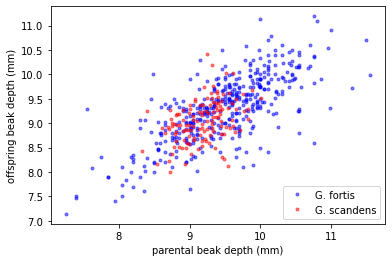

In [82]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()